In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,f1_score

In [ ]:
def split(data, test_data, drop):
    X_train = data.copy()#.drop(['name'], axis=1)
    y_train = X_train.pop('target')
    X_test = test_data.copy()#.drop(['name'], axis=1)
    y_test = X_test.pop('target')

    X_train = X_train[y_train != drop]
    X_test = X_test[y_test != drop]

    y_train = y_train[y_train != drop]
    y_test = y_test[y_test != drop]

    std = StandardScaler()
    std.fit(X_train)
    X_train = pd.DataFrame(std.transform(X_train), columns = X_train.columns, index = X_train.index)
    X_test = pd.DataFrame(std.transform(X_test), columns = X_test.columns, index = X_test.index)
    return X_train, y_train, X_test, y_test, std

In [ ]:
def train_test(model, X_train, y_train, X_test, y_test):
    model = model.fit(X_train, y_train)
    y_pred = pd.Series(model.predict(X_test),index=y_test.index)
    return model, y_pred

In [ ]:
data = pd.read_csv('dataset/train.csv', index_col='name')
test_data = pd.read_csv('dataset/test.csv', index_col='name')

In [ ]:
models = {
    "Random Forest": RandomForestClassifier(
                    random_state=42,
                    max_features='auto',
                    n_estimators= 500,
                    max_depth=6,
                    criterion='entropy'),
    "ANN": MLPClassifier(
                    max_iter=600,
                    momentum=0.6,
                    solver='adam',
                    activation='relu',
                    learning_rate_init=0.005,
                    alpha=0.001),
    "SVM": svm.SVC(),
    "Decision Tree": DecisionTreeClassifier(
                    random_state = 42,
                    criterion = 'entropy',
                    max_depth = 2,
                    max_features = 'log2',
                    splitter = 'best'),
    "KNN": KNeighborsClassifier(
                    algorithm='auto',
                    leaf_size=30,
                    metric='minkowski',
                    metric_params=None,
                    n_jobs=10,
                    n_neighbors=2,
                    p=3,
                     weights='uniform'),
}
classes = ['normal', 'fatty', 'cirrhosis']

for drop in classes:
    results = pd.DataFrame()
    X_train, y_train, X_test, y_test, std = split(data, test_data, drop)
    classes = np.unique(y_train)
    for col in X_train.columns:
        temp = {}
#         print(*[cls for cls in classes if cls != drop])
        for name in models.keys():
            model, y_pred = train_test(models[name], X_train[col].values.reshape(-1, 1), y_train, X_test[col].values.reshape(-1, 1), y_test)
#             print(name," Accuracy: ",accuracy_score(y_pred,y_test))
            temp[f"{name} Accuracy"] = accuracy_score(y_pred,y_test)
#         print('\n\n')
        results = results.append(pd.DataFrame(temp,index=[col]))
    results.to_csv(f"D:/JupyterNotebook/Grad Project/Main Project/dataset/manual selection/{classes[0]}_{classes[1]}.csv")

## Visualization

In [2]:
data = pd.read_csv(f'dataset/manual selection/fatty_normal.csv', index_col = 0)
data.head()

,Random Forest Accuracy,ANN Accuracy,SVM Accuracy,Decision Tree Accuracy,KNN Accuracy
10Percentile,0.615132,0.615132,0.618421,0.598684,0.578947
90Percentile,0.628289,0.648026,0.621711,0.634868,0.562500
Autocorrelation,0.486842,0.536184,0.513158,0.496711,0.473684
ClusterProminence,0.503289,0.503289,0.523026,0.519737,0.480263
ClusterShade,0.536184,0.549342,0.529605,0.532895,0.503289


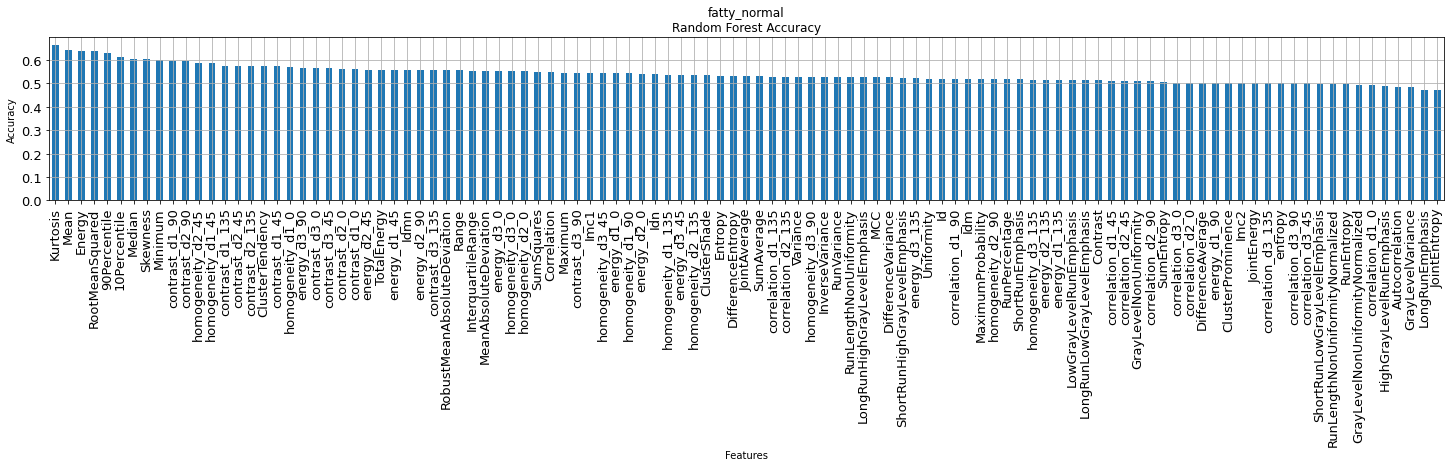

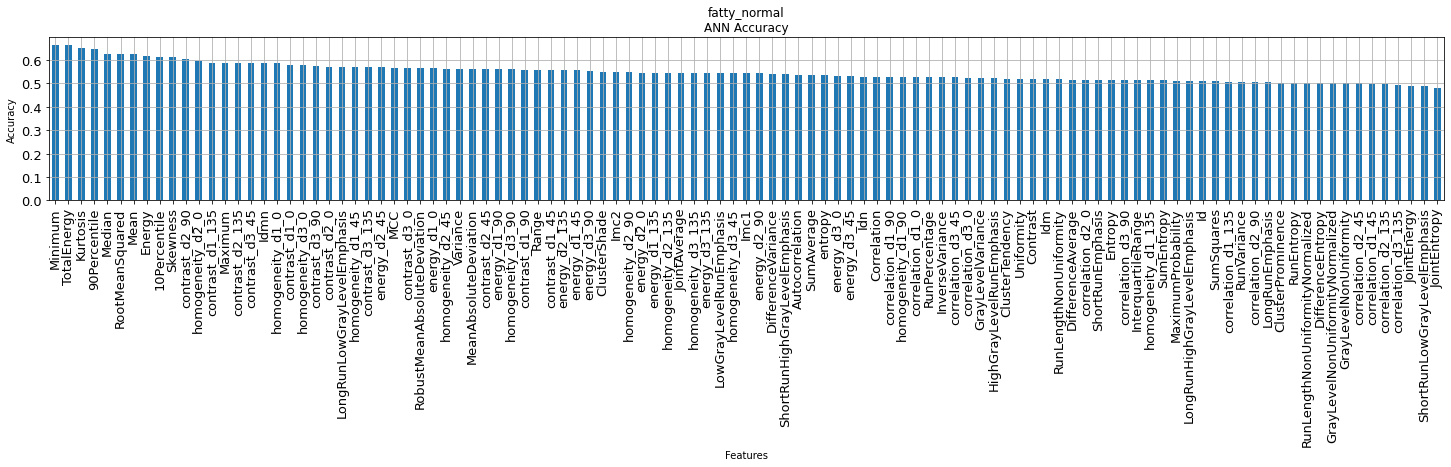

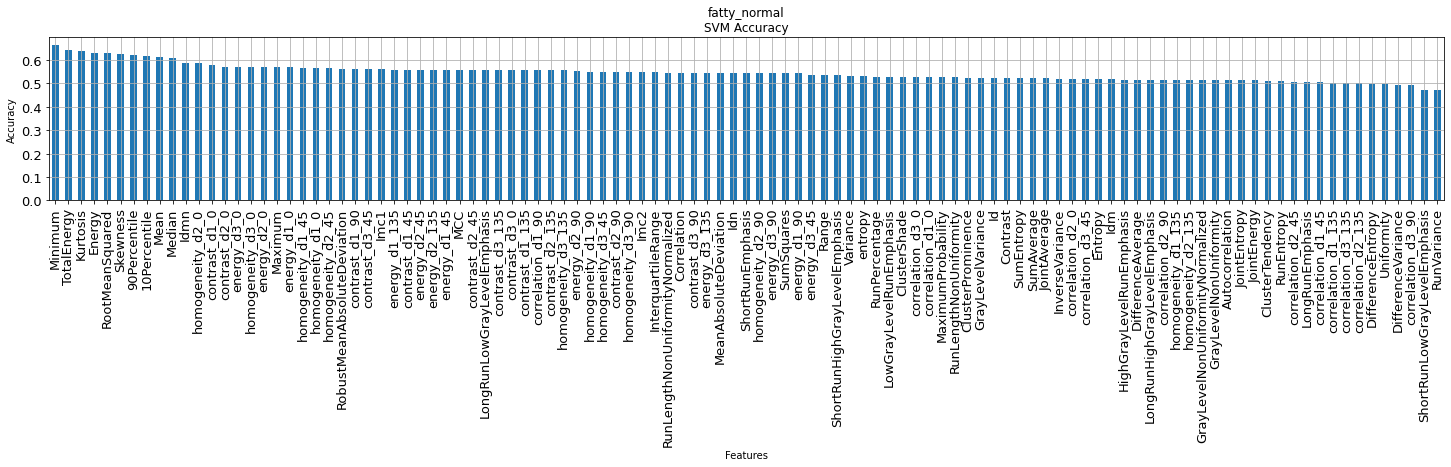

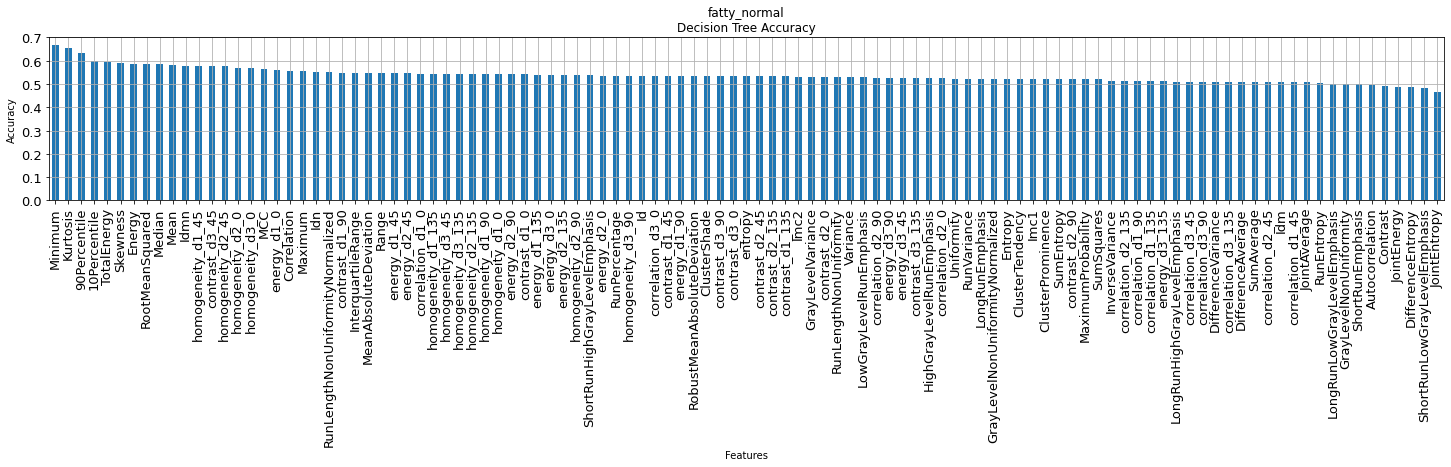

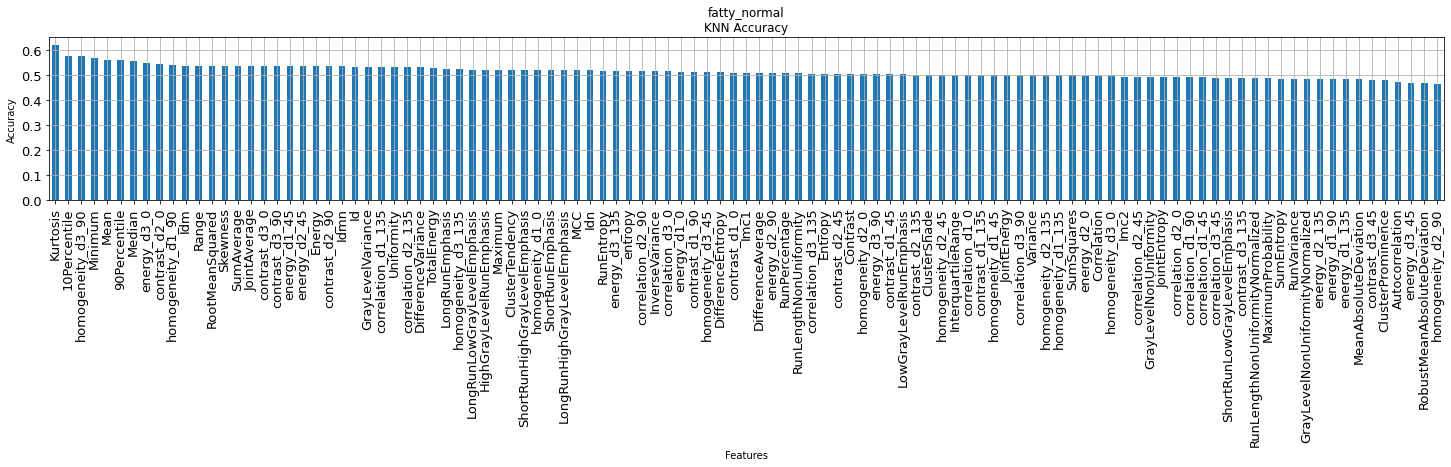



___________________________________________________________________________________________________________________




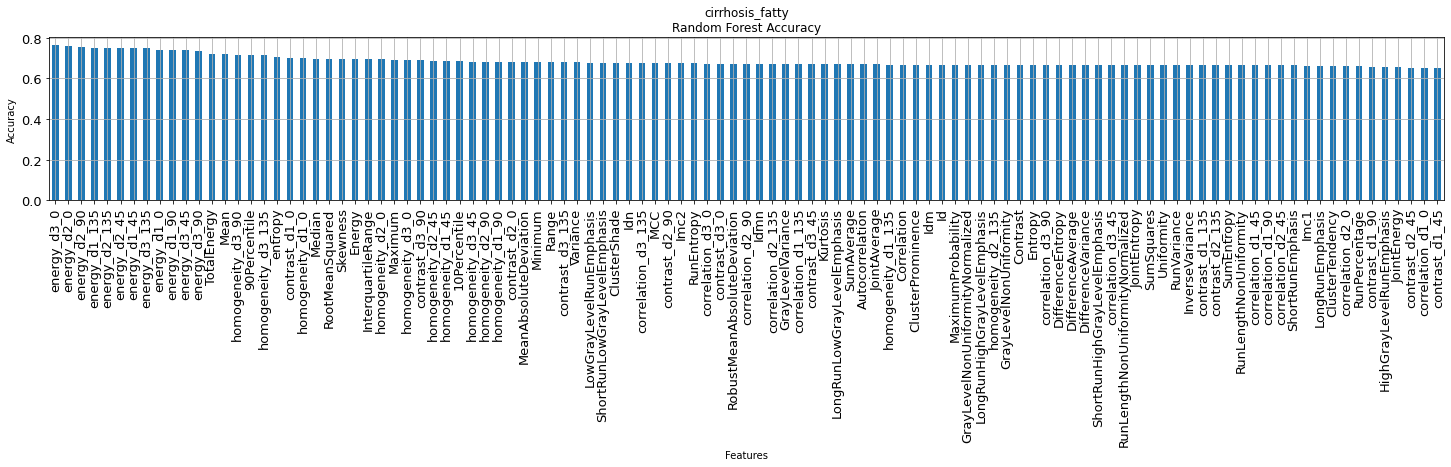

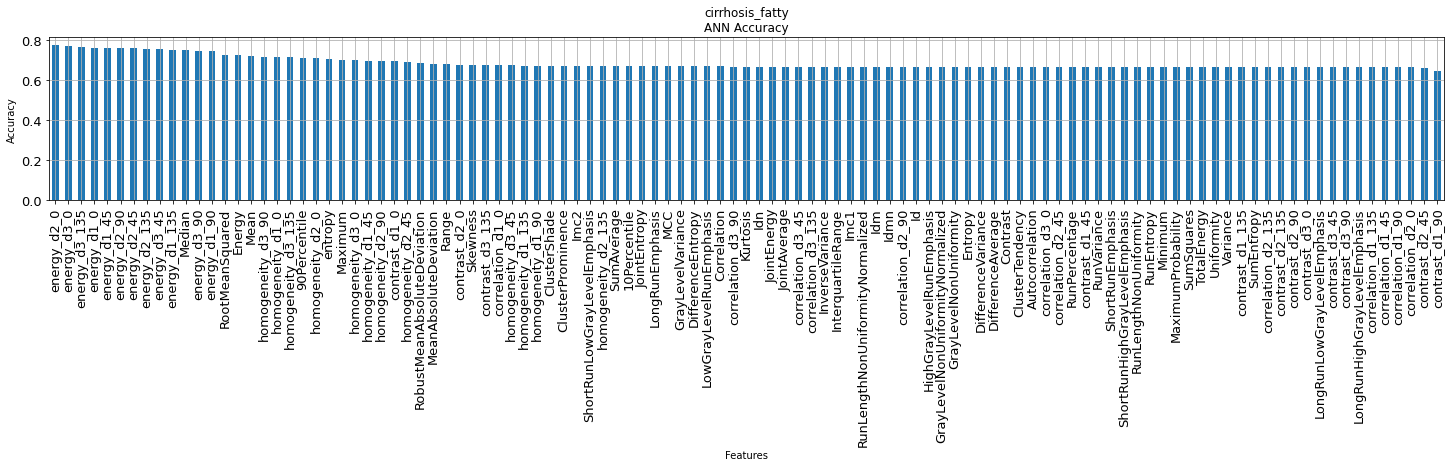

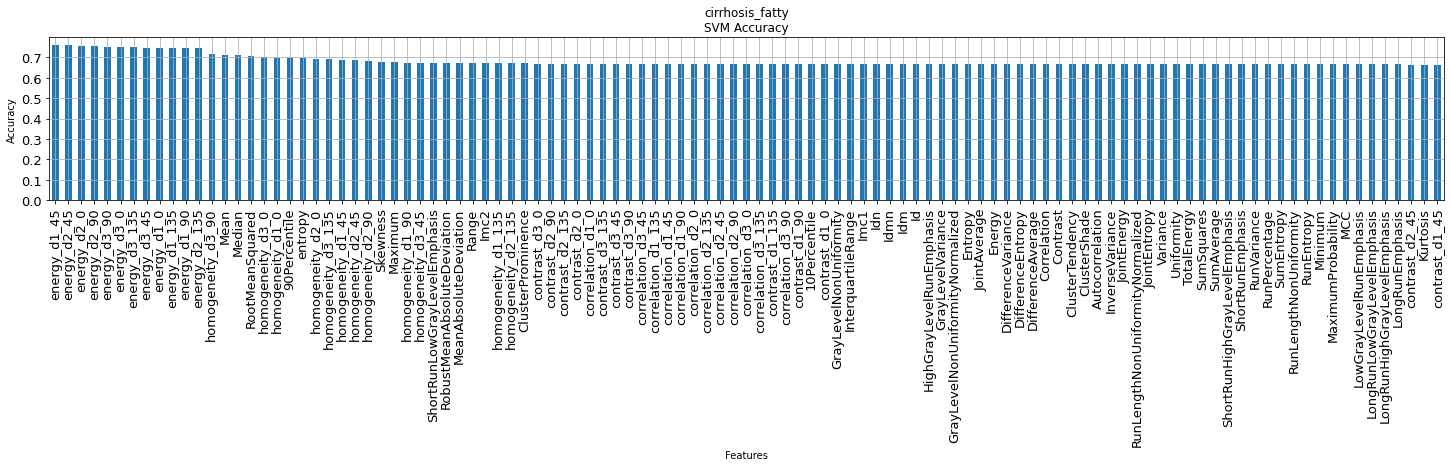

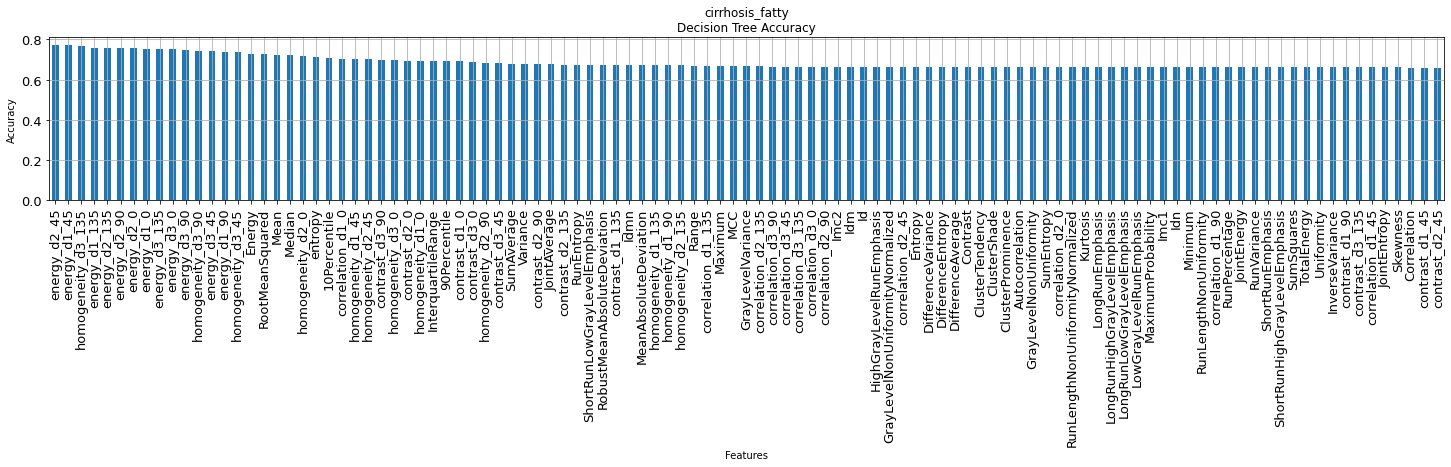

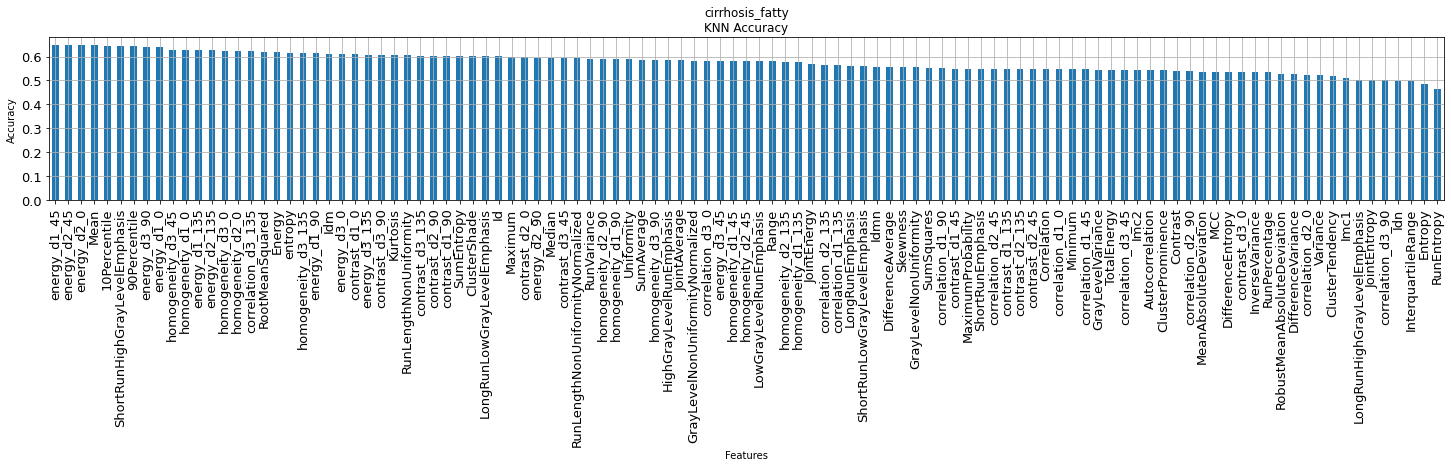



___________________________________________________________________________________________________________________




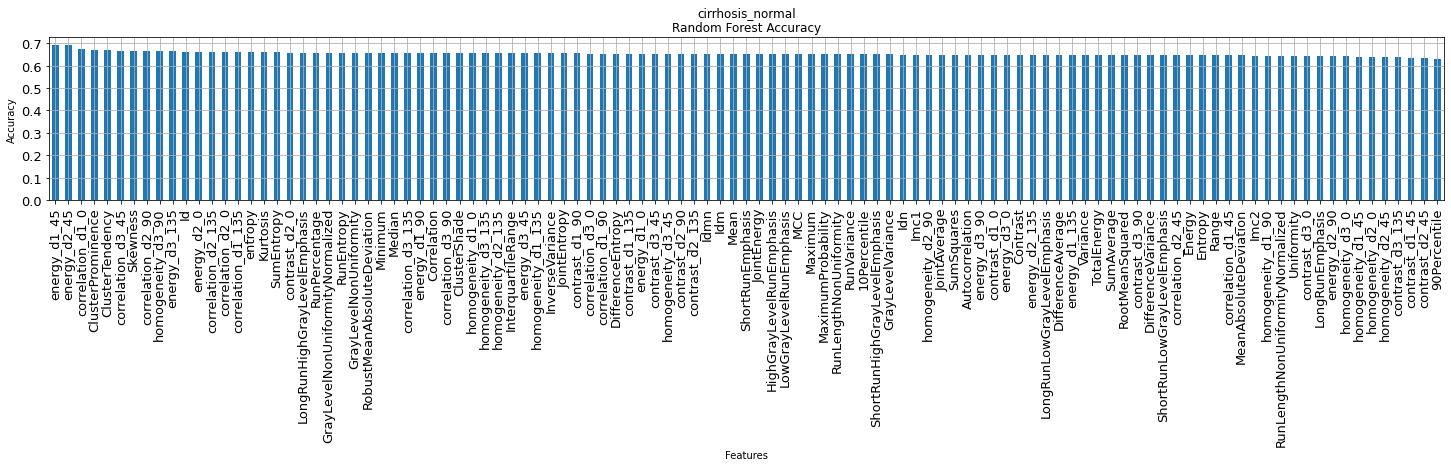

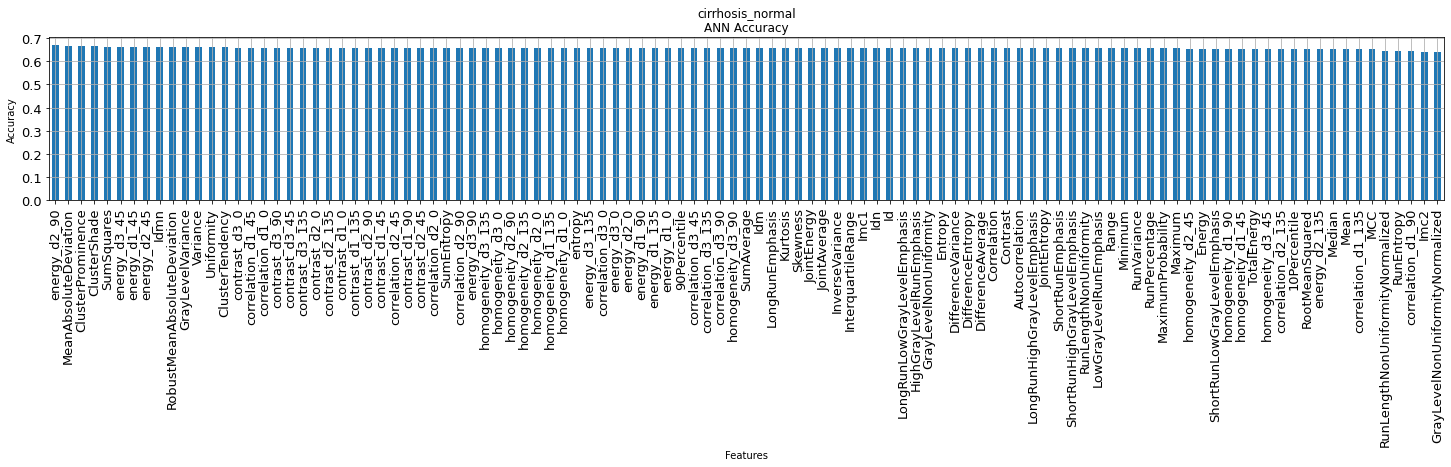

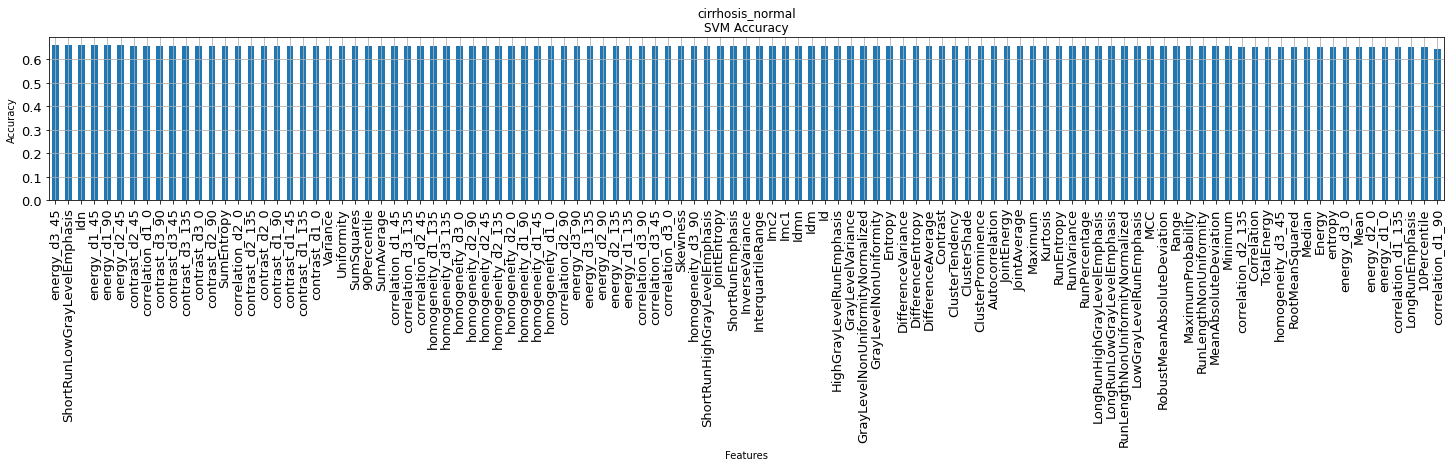

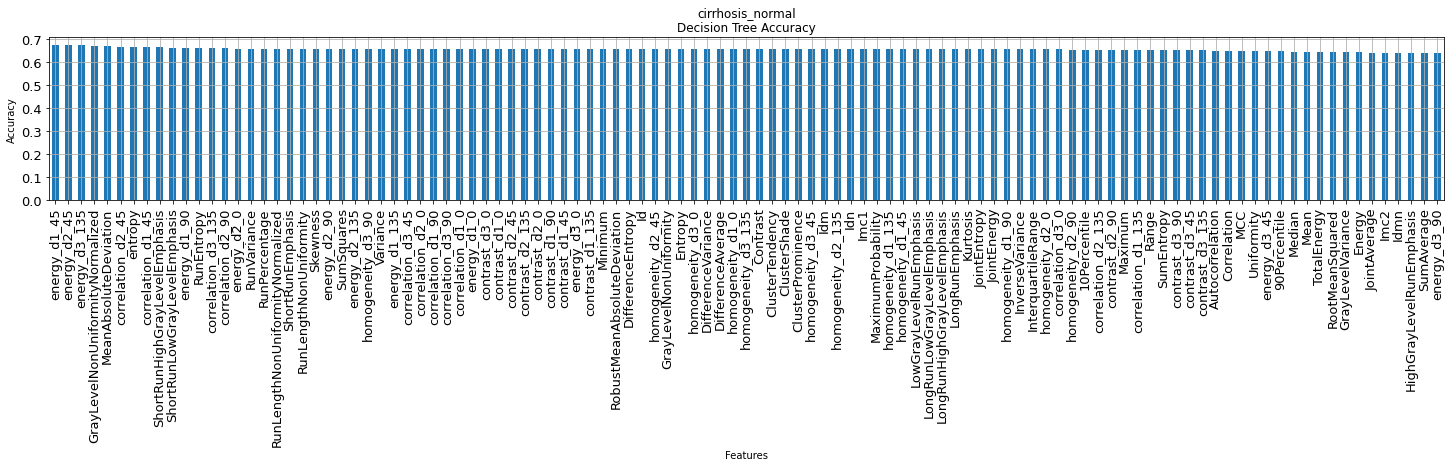

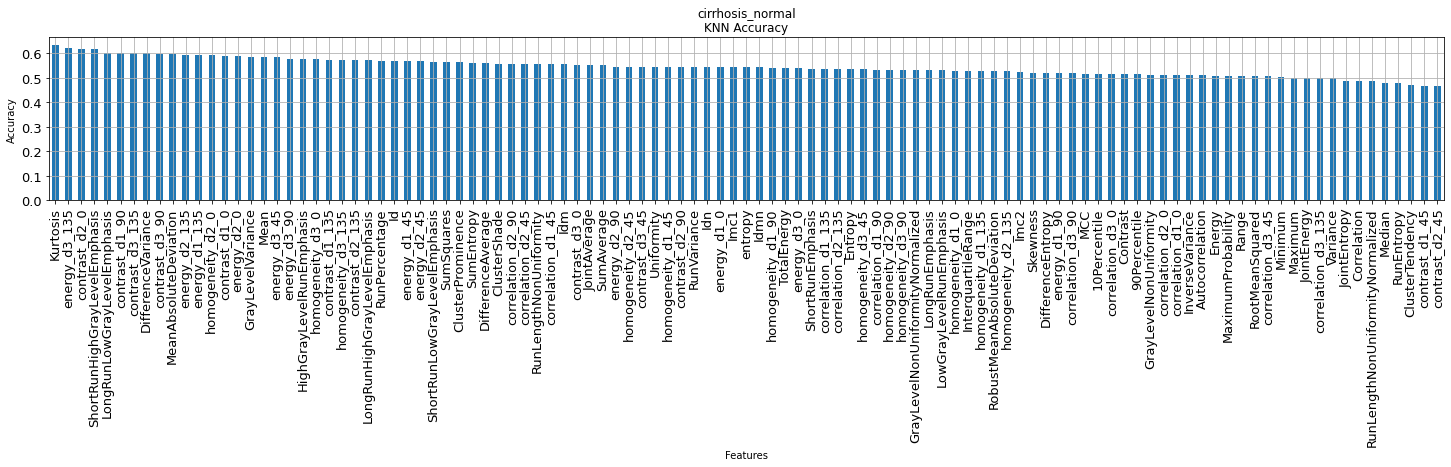



___________________________________________________________________________________________________________________




In [3]:
files = ['fatty_normal', 'cirrhosis_fatty', 'cirrhosis_normal']
for name in files:
    data = pd.read_csv(f'dataset/manual selection/{name}.csv', index_col = 0)
    for col in data.columns:
        model_accuracy = data[col].copy()
        model_accuracy.sort_values(ascending=False, inplace=True)
        model_accuracy.plot(title=f'{name}\n{col}',xlabel='Features',ylabel="Accuracy",kind="bar", legend=False, figsize=(25,3), fontsize=13, grid=True)
        plt.show()
    print('\n\n___________________________________________________________________________________________________________________\n\n')